In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root, fixed_point
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Load Training Data

filename = "/home/smalani/Cybernetic_BioModel/optogenetic_model_fits/June152023Onwards/trainingData/SGy139_TimeCourse_Jun9_23.xlsx"
df_br1 = pd.read_excel(filename, sheet_name="Bioreactor1")
df_br2 = pd.read_excel(filename, sheet_name="Bioreactor2")

df_br1.head()

In [ ]:
# Visualize Training Data

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(211)
ax.plot(df_br1["BatchTime"], df_br1["GrowthRate"], linewidth=2, color="blue", label="Bioreactor 1")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth Rate (1/h)")
ax2 = ax.twinx()
ax2.plot(df_br1["BatchTime"], df_br1["Phase"], linewidth=2, color="green", label="Bioreactor 1")

ax = fig.add_subplot(212)
ax.plot(df_br2["BatchTime"], df_br2["GrowthRate"], linewidth=2, color="red", label="Bioreactor 2")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth Rate (1/h)")
ax2 = ax.twinx()
ax2.plot(df_br2["BatchTime"], df_br2["Phase"], linewidth=2, color="green", label="Bioreactor 2")

In [ ]:
# Truncate and Smooth Data
from scipy.signal import savgol_filter

# Truncate data to remove initial lag phase
time_cutoff = 18
df_br1_trunc = df_br1[df_br1["BatchTime"] > time_cutoff].copy()
df_br2_trunc = df_br2[df_br2["BatchTime"] > time_cutoff].copy()

# Smooth data using Savitzky-Golay filter
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html
# Parameters
window_size = 151
poly_order = 3
deriv = 0
df_br1_trunc["GrowthRateSmooth"] = savgol_filter(df_br1_trunc["GrowthRate"], window_size, poly_order, deriv=deriv)
df_br2_trunc["GrowthRateSmooth"] = savgol_filter(df_br2_trunc["GrowthRate"], window_size, poly_order, deriv=deriv)

# Visualize truncated and smoothed data
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(211)
ax.plot(df_br1_trunc["BatchTime"], df_br1_trunc["GrowthRate"], '--', linewidth=2, color="black", label="Bioreactor 1 (Raw)")
ax.plot(df_br1_trunc["BatchTime"], df_br1_trunc["GrowthRateSmooth"], linewidth=1, color="blue", label="Bioreactor 1")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth Rate (1/h)")
ax2 = ax.twinx()
ax2.plot(df_br1_trunc["BatchTime"], df_br1_trunc["Phase"], linewidth=2, color="green", label="Bioreactor 1")

ax = fig.add_subplot(212)
ax.plot(df_br2_trunc["BatchTime"], df_br2_trunc["GrowthRate"], '--', linewidth=2, color="black", label="Bioreactor 2 (Raw)")
ax.plot(df_br2_trunc["BatchTime"], df_br2_trunc["GrowthRateSmooth"], linewidth=1, color="red", label="Bioreactor 2")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth Rate (1/h)")
ax2 = ax.twinx()
ax2.plot(df_br2_trunc["BatchTime"], df_br2_trunc["Phase"], linewidth=2, color="green", label="Bioreactor 2")

In [ ]:
# Split dataframe by Phase

df_br1_trunc_grouped = df_br1_trunc.groupby("Phase")
df_br2_trunc_grouped = df_br2_trunc.groupby("Phase")

keys = list(df_br1_trunc_grouped.groups.keys())
print(keys)

mu_mean_br1 = []
mu_std_br1 = []
mu_mean_br2 = []
mu_std_br2 = []
mu_mean_overall = []
mu_std_overall = []

rangeme = 20

for key in keys:
    df = df_br1_trunc_grouped.get_group(key)
    mu_mean_br1.append(df["GrowthRateSmooth"].iloc[-rangeme:].mean())
    mu_std_br1.append(df["GrowthRateSmooth"].iloc[-rangeme:].std())
    df = df_br2_trunc_grouped.get_group(key)
    mu_mean_br2.append(df["GrowthRateSmooth"].iloc[-rangeme:].mean())
    mu_std_br2.append(df["GrowthRateSmooth"].iloc[-rangeme:].std())

    mu_mean_overall.append((mu_mean_br1[-1] + mu_mean_br2[-1])/2)
    mu_std_overall.append(np.sqrt(mu_std_br1[-1]**2 + mu_std_br2[-1]**2))
    

print(mu_mean_br1)
print(mu_std_br1)
print(mu_mean_br2)
print(mu_std_br2)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.semilogx(keys, mu_mean_br1, linewidth=2, color="blue", label="Bioreactor 1")
ax.semilogx(keys, mu_mean_br2, linewidth=2, color="red", label="Bioreactor 2")
ax.semilogx(keys, mu_mean_overall, linewidth=2, color="black", label="Overall")

In [ ]:
fig = plt.figure(figsize=(3, 2))
ax = fig.add_subplot(111)
ax.semilogx(keys, mu_mean_overall, 'o', linewidth=2, color="blue", label="Bioreactor 1")

fig = plt.figure(figsize=(3, 2))
ax = fig.add_subplot(111)
ax.plot(keys, mu_mean_overall, 'o', linewidth=2, color="blue", label="Bioreactor 1")

In [ ]:
# Load Training Data

filename = "/home/smalani/Cybernetic_BioModel/optogenetic_model_fits/June152023Onwards/trainingData/SGy139_ActDeAct_Mar1_23.xlsx"
df_br1_actdeact = pd.read_excel(filename, sheet_name="Bioreactor1")
df_br2_actdeact = pd.read_excel(filename, sheet_name="Bioreactor2")

df_br1_actdeact.head()

In [ ]:
# Truncate and Smooth Data
from scipy.signal import savgol_filter

# Truncate data to remove initial lag phase
time_cutoff = 18
df_br1_trunc_actdeact = df_br1_actdeact[df_br1_actdeact["BatchTime"] > time_cutoff].copy()
df_br2_trunc_actdeact = df_br2_actdeact[df_br2_actdeact["BatchTime"] > time_cutoff].copy()

# Smooth data using Savitzky-Golay filter
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html
# Parameters
window_size = 151
poly_order = 3
deriv = 0
df_br1_trunc_actdeact["GrowthRateSmooth"] = savgol_filter(df_br1_trunc_actdeact["GrowthRate"], window_size, poly_order, deriv=deriv)
df_br2_trunc_actdeact["GrowthRateSmooth"] = savgol_filter(df_br2_trunc_actdeact["GrowthRate"], window_size, poly_order, deriv=deriv)

# Visualize truncated and smoothed data
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(211)
ax.plot(df_br1_trunc_actdeact["BatchTime"], df_br1_trunc_actdeact["GrowthRate"], '--', linewidth=2, color="black", label="Bioreactor 1 (Raw)")
ax.plot(df_br1_trunc_actdeact["BatchTime"], df_br1_trunc_actdeact["GrowthRateSmooth"], linewidth=1, color="blue", label="Bioreactor 1")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth Rate (1/h)")
ax2 = ax.twinx()
ax2.plot(df_br1_trunc_actdeact["BatchTime"], df_br1_trunc_actdeact["Phase"], linewidth=2, color="green", label="Bioreactor 1")

ax = fig.add_subplot(212)
ax.plot(df_br2_trunc_actdeact["BatchTime"], df_br2_trunc_actdeact["GrowthRate"], '--', linewidth=2, color="black", label="Bioreactor 2 (Raw)")
ax.plot(df_br2_trunc_actdeact["BatchTime"], df_br2_trunc_actdeact["GrowthRateSmooth"], linewidth=1, color="red", label="Bioreactor 2")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth Rate (1/h)")
ax2 = ax.twinx()
ax2.plot(df_br2_trunc_actdeact["BatchTime"], df_br2_trunc_actdeact["Phase"], linewidth=2, color="green", label="Bioreactor 2")

In [ ]:
# Split dataframe by Phase

df_br1_trunc_actdeact_grouped = df_br1_trunc_actdeact.groupby("Phase")
df_br2_trunc_actdeact_grouped = df_br2_trunc_actdeact.groupby("Phase")

keys_br1_actdeact = list(df_br1_trunc_actdeact_grouped.groups.keys())
keys_br2_actdeact = list(df_br2_trunc_actdeact_grouped.groups.keys())

keys_add_br1 = []
keys_add_br2 = []


mu_mean_br1_actdeact = []
mu_std_br1_actdeact = []
mu_mean_br2_actdeact = []
mu_std_br2_actdeact = []

rangeme = 20

for key in keys_br1_actdeact:
    df = df_br1_trunc_actdeact_grouped.get_group(key)
    mu_mean_br1_actdeact.append(df["GrowthRateSmooth"].iloc[-rangeme:].mean())
    mu_std_br1_actdeact.append(df["GrowthRateSmooth"].iloc[-rangeme:].std())
    # df = df_br2_trunc_actdeact_grouped.get_group(key)
    # mu_mean_br2.append(df["GrowthRateSmooth"].iloc[-rangeme:].mean())
    # mu_std_br2.append(df["GrowthRateSmooth"].iloc[-rangeme:].std())

    if '_0%' in key:
        keys_add_br1.append(0)
    elif '_10%' in key:
        keys_add_br1.append(0.1)

for key in keys_br2_actdeact:
    df = df_br2_trunc_actdeact_grouped.get_group(key)
    mu_mean_br2_actdeact.append(df["GrowthRateSmooth"].iloc[-rangeme:].mean())
    mu_std_br2_actdeact.append(df["GrowthRateSmooth"].iloc[-rangeme:].std())
    # df = df_br2_trunc_actdeact_grouped.get_group(key)
    # mu_mean_br2.append(df["GrowthRateSmooth"].iloc[-rangeme:].mean())
    # mu_std_br2.append(df["GrowthRateSmooth"].iloc[-rangeme:].std())

    if '_0%' in key:
        keys_add_br2.append(0)
    elif '_10%' in key:
        keys_add_br2.append(0.1)

    

print(mu_mean_br1)
print(mu_std_br1)
print(mu_mean_br2)
print(mu_std_br2)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(keys, mu_mean_br1, 'o', linewidth=2, color="blue", label="Bioreactor 1")
ax.plot(keys, mu_mean_br2, 'o', linewidth=2, color="red", label="Bioreactor 2")
ax.plot(keys_add_br1, mu_mean_br1_actdeact, 'o', linewidth=2, color="blue", label="Bioreactor 1")
ax.plot(keys_add_br2, mu_mean_br2_actdeact, 'o', linewidth=2, color="red", label="Bioreactor 2")

ax.set_xscale('symlog', linthresh=0.01)

In [ ]:
keys_plot = keys + keys_add_br1 + keys_add_br2
mu_plot = mu_mean_br1 + mu_mean_br1_actdeact + mu_mean_br2_actdeact
mu_plot = np.array(mu_plot)
keys_plot = np.array(keys_plot)

mu_plot = mu_plot[np.argsort(keys_plot)]
keys_plot = keys_plot[np.argsort(keys_plot)]

keys_unique = np.unique(keys_plot)
mu_unique = []
mu_std_unique = []

for key in keys_unique:
    mu_unique.append(mu_plot[keys_plot == key].mean())
    mu_std_unique.append(mu_plot[keys_plot == key].std())


fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(keys_unique, mu_unique, 'o', linewidth=2, color="blue", label="Bioreactor 1")
ax.errorbar(keys_unique, mu_unique, yerr=mu_std_unique, fmt='o', linewidth=2, color="blue", label="Bioreactor 1")
ax.set_xscale('symlog', linthresh=0.01)


In [ ]:
from scipy.optimize import curve_fit, root

# Steady State Equations

def opto_ode(t, y, p, I):
    T, R = y
    kon, koff, kbasal, kmax, n, Kd, kdegR = p

    T = max(0, T)

    dTdt = I * kon  * (1-T) - koff * T
    dRdt = kbasal + kmax * (T**n / (Kd**n + T**n)) - kdegR * R

    out = np.array([dTdt, dRdt])
    return out

def opto_ode_ss(pulse, period, p, guess=None):
    Imax = 1
    if guess is None:
        guess = np.array([pulse, pulse])
    def f_solve(xinit):
        if pulse > 0:
            sol = solve_ivp(opto_ode, [0, period*pulse], xinit, args=(p, Imax,), atol=1e-6, rtol=1e-6, method="BDF")
            sol = solve_ivp(opto_ode, [period*pulse, period], sol.y[:,-1], args=(p,0), atol=1e-6, rtol=1e-6, method="BDF")
        else:
            sol = solve_ivp(opto_ode, [0, period], xinit, args=(p, 0,), atol=1e-6, rtol=1e-6, method="BDF")

        out = sol.y[:,-1] - xinit[:]
        return out

    rootsol = root(f_solve, guess, options={'xtol': 1e-8, 'maxfev': 1000})

    if not rootsol.success:
        # print("Root finding failed at pulse = ", pulse)
        return 0, 0
    
    if pulse > 0:
        sol_first = solve_ivp(opto_ode, [0, period*pulse], rootsol.x, args=(p, Imax,), atol=1e-8, rtol=1e-8, method="BDF", t_eval=np.linspace(0, period*pulse, 1000))
        sol_second = solve_ivp(opto_ode, [period*pulse, period], sol_first.y[:,-1], args=(p,0), atol=1e-8, rtol=1e-8, method="BDF", t_eval=np.linspace(period*pulse, period, 1000))

        # Average outputs by integrating over the period
        Tss = (np.trapz(sol_first.y[0,:], sol_first.t) + np.trapz(sol_second.y[0,:], sol_second.t)) / period
        Rss = (np.trapz(sol_first.y[1,:], sol_first.t) + np.trapz(sol_second.y[1,:], sol_second.t)) / period
    
    else:
        sol = solve_ivp(opto_ode, [0, period], rootsol.x, args=(p, 0,), atol=1e-8, rtol=1e-8, method="BDF", t_eval=np.linspace(0, period, 1000))
        Tss = np.trapz(sol.y[0,:], sol.t) / period
        Rss = np.trapz(sol.y[1,:], sol.t) / period

    return Tss, Rss



def mu_steady(pulse_arr, kon, koff, kbasal, kmax, Kd, n, kE, KAmp, nAmp):
    # Keep Constant For Now
    kdeg_R, kAmp, kdeg_Amp, kdeg_E, mu_max = 1e5, 1e5, 1e5, 1e5, 1

    period = 100
    
    Tss_arr, Rss_arr, Ampss_arr, Ess_arr, mu_arr = [], [], [], [], []

    for pulse in pulse_arr:
        p_opto = [kon, koff, kbasal, kmax, n, Kd, kdeg_R]
        Tss, Rss = opto_ode_ss(pulse, period, p_opto)
        Ampss = kAmp * Rss / kdeg_Amp
        Ess = (kE * Ampss**nAmp / (KAmp**nAmp + Ampss**nAmp)) / kdeg_E
        mu = mu_max * Ess

        Tss_arr.append(Tss)
        Rss_arr.append(Rss)
        Ampss_arr.append(Ampss)
        Ess_arr.append(Ess)
        mu_arr.append(mu)
    
    return Tss_arr, Rss_arr, Ampss_arr, Ess_arr, mu_arr

def minimize_fun(pars, pulse_arr, mu_unique, info):
    _, _, _, _, mu_arr = mu_steady(pulse_arr, *pars)
    error = np.sum((np.array(mu_arr) - np.array(mu_unique))**2)

    if error < info['error_best']:
        info['error_best'] = error
        info['pars_best'] = pars

    if info['Nfeval']%10 == 0:
        print('Nfeval: ', info['Nfeval'], 'error_best: ', info['error_best'], 'pars_best: ', info['pars_best'], 'error: ', error, 'pars: ', pars)
    info['Nfeval'] += 1
    return np.sum((np.array(mu_arr) - np.array(mu_unique))**2)

def minimize_fun_ls(pars, pulse_arr, mu_unique, info):
    _, _, _, _, mu_arr = mu_steady(pulse_arr, *pars)
    error = np.sum((np.array(mu_arr) - np.array(mu_unique))**2)

    if error < info['error_best']:
        info['error_best'] = error
        info['pars_best'] = pars

    if info['Nfeval']%10 == 0:
        print('Nfeval: ', info['Nfeval'], 'error_best: ', info['error_best'], 'pars_best: ', info['pars_best'], 'error: ', error, 'pars: ', pars)
    info['Nfeval'] += 1
    return np.array(mu_arr) - np.array(mu_unique)

In [ ]:
# Interpolate more values for curve fit

keys_unique_interp = np.array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.03 , 0.05 , 0.08, 0.1  ])
mu_unique_interp = np.interp(keys_unique_interp, keys_unique, mu_unique)

In [ ]:
# Initial Guess
kon = 8.36584314e-01
koff = 3.09772171e-03
kbasal = 6.12172752e+03
kmax = 1.05442021e+05
Kd = 1.00497835e+00
n = 4.74552130e+00
kE = 3.47476795e+04
KAmp = 3.62010035e-01
nAmp = 1.37571026e+00 #* 1.2

p0 = [kon, koff, kbasal, kmax, Kd, n, kE, KAmp, nAmp]

# Plot initial guess
I_arr = keys_unique#_interp
Tss_arr, Rss_arr, Ampss_arr, Ess_arr, mu_arr = mu_steady(I_arr, *p0)

# mu_arr = np.array(Ess_arr) * 1.1

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(I_arr, mu_arr, '-', linewidth=2, color="blue", label="Bioreactor 1")
ax.plot(keys_unique_interp, mu_unique_interp, 'o', linewidth=2, color="blue", label="Bioreactor 1")
ax.set_xscale('symlog', linthresh=0.01)

In [ ]:
from scipy.optimize import curve_fit, minimize, shgo, basinhopping, least_squares, differential_evolution, dual_annealing



# Fit
def curve_fit_fun(pulse_arr, kon, koff, kbasal, kmax, Kd, n, kE, KAmp, nAmp):
    return mu_steady(pulse_arr, kon, koff, kbasal, kmax, Kd, n, kE, KAmp, nAmp)[4]

# popt, pcov = curve_fit(curve_fit_fun, I_arr, mu_unique_interp, p0=p0, maxfev=100000)
bounds = [(1e-2, 1e1), (1e-5, 1e-1), (1e3, 1e5), (1e4, 1e6), (1e-1, 1e1), (1e-1, 1e1), (1e4, 1e6), (1e-1, 1e1), (1e-1, 1e1)]
info = {'Nfeval':0, 'error_best': 1e10, 'pars_best': np.nan}

bounds_ls = [(1e-2, 1e-5, 1e3, 1e4, 1e-1, 1e-1, 1e4, 1e-1, 1e-1), (1e1, 1e-1, 1e5, 1e6, 1e1, 1e1, 1e6, 1e1, 1e1)]
x_scale = np.array([1e0, 1e-4, 1e4, 1e5, 1e0, 1e0, 1e5, 1e0, 1e0])
# res = least_squares(minimize_fun_ls, x0=p0, args=(I_arr, mu_unique, info), bounds=bounds_ls, max_nfev=100000, xtol=1e-10, ftol=1e-10, gtol=1e-10, x_scale=x_scale)

# res = minimize(minimize_fun, x0=p0, args=(I_arr, mu_unique, info), bounds=bounds) 
# res = minimize(minimize_fun, x0=p0, args=(I_arr, mu_unique, info), bounds=bounds, method='Nelder-Mead', options={'maxiter':100000}) 
# res = shgo(minimize_fun, args=(I_arr, mu_unique, {'Nfeval':0}), bounds=bounds)
class MyTakeStep(object):
    def __init__(self, stepsize=0.05):
        self.stepsize = stepsize

    def __call__(self, x):
        print('Stepping')
        s = self.stepsize
        x *= (1 + np.random.uniform(-s, s, x.shape))
        return x
# res = basinhopping(minimize_fun, x0=p0, minimizer_kwargs={'args':(I_arr, mu_unique, info), 'bounds':bounds}, T=1e-0, niter=1000, niter_success=100, take_step=MyTakeStep(stepsize=0.2), disp=True, callback=None, interval=1, stepsize=0.2)

# res = basinhopping(minimize_fun, x0=p0, minimizer_kwargs={'method':'L-BFGS-B', 'args':(I_arr, mu_unique, info), 'bounds':bounds, 'options': {'maxiter': 100}}, T=1e-0, niter=1000, niter_success=100, take_step=MyTakeStep(stepsize=0.1), disp=True, callback=None, interval=1, stepsize=0.1)
# print(res.x)

# res = differential_evolution(minimize_fun, args=(I_arr, mu_unique, info), bounds=bounds, maxiter=1000, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=1e-10)

# res = dual_annealing(minimize_fun, args=(I_arr, mu_unique, info), bounds=bounds, maxiter=100000, minimizer_kwargs={'method':'L-BFGS-B', 'options':{'maxiter':100000}}, initial_temp=523, restart_temp_ratio=0.001, visit=1.5, accept=-100, maxfun=1e7, seed=None, no_local_search=True, callback=None, x0=p0)

# Tss_arr, Rss_arr, Ampss_arr, Ess_arr, mu_arr = mu_steady(I_arr, *parameters)

# fig = plt.figure(figsize=(6, 4))
# ax = fig.add_subplot(111)
# ax.plot(I_arr, mu_arr, '-', linewidth=2, color="blue", label="Bioreactor 1")
# ax.plot(keys_unique, mu_unique, 'o', linewidth=2, color="blue", label="Bioreactor 1")
# ax.set_xscale('symlog', linthresh=0.01)

In [ ]:
parameters = p0

In [ ]:
fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)

ax.plot(df_br1_trunc["BatchTime"], df_br1_trunc["GrowthRateSmooth"], linewidth=1, color="blue", label="Bioreactor 1")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth Rate (1/h)")
ax2 = ax.twinx()
ax2.plot(df_br1_trunc["BatchTime"], df_br1_trunc["Phase"], linewidth=2, color="green", label="Bioreactor 1")

In [ ]:
def myODEs(t, x, pfixed, pvar, pulse):
    if callable(pulse):
        pulse = pulse(t)
    # Unpack Parameters
    kon, koff, kbasal_base, kmax_base, Kd, n, kE_base, KAmp, nAmp = pfixed
    kdeg_R, kdeg_Amp, kdeg_E = pvar

    kbasal = kbasal_base * kdeg_R / 1e5
    kmax = kmax_base * kdeg_R / 1e5
    kE = kE_base * kdeg_E / 1e5
    kAmp = kdeg_Amp

    global pulse_old, R_ss
    if pulse != pulse_old:
        period = 100
        p = kon, koff, kbasal, kmax, n, Kd, kdeg_R
        _, R_ss = opto_ode_ss(pulse, period, p)
        pulse_old = pulse

    # Unpack Variables
    R, Amp, E = x

    # Equations
    dRdt = (R_ss - R) * kdeg_R
    dAmpdt = kAmp * R - kdeg_Amp * Amp
    dEdt = kE * Amp**nAmp / (KAmp**nAmp + Amp**nAmp) - kdeg_E * E

    return np.array([dRdt, dAmpdt, dEdt])

In [ ]:
# s = df_br1_trunc["Phase"]
# # time_array_fit = [df_br1_trunc["BatchTime"].iloc[0]]
# time_array_fit = []
# time_array_fit = np.append(time_array_fit, df_br1_trunc["BatchTime"][s[s.diff() != 0].index.tolist()])
# time_array_fit = np.append(time_array_fit, df_br1_trunc["BatchTime"].iloc[-1])

# # pulse_array_fit = [df_br1_trunc["Phase"].iloc[0]]
# pulse_array_fit = []
# pulse_array_fit = np.append(pulse_array_fit, df_br1_trunc["Phase"][s[s.diff() != 0].index.tolist()])
# # pulse_array_fit = np.append(pulse_array_fit, df_br1_trunc["Phase"].iloc[-1])

# print(time_array_fit)
# print(pulse_array_fit)
# print(mu_steady(pulse_array_fit, *parameters)[-1])

In [ ]:
# mu_steady([pulse_array_fit[0]], *parameters)
pulse = 0.1
period = 100
kdegR = 1e5
p = kon, koff, kbasal, kmax, n, Kd, kdegR
global pulse_old, R_ss
_, R_ss = opto_ode_ss(pulse, period, p)
pulse_old = pulse

In [ ]:
# from scipy.interpolate import interp1d

# pulse_fun_interp = interp1d(time_array_fit[:-1], pulse_array_fit, kind='previous', fill_value="extrapolate")

# def pulse_fun(t):
#     t_start = df_br1_trunc["BatchTime"].to_numpy()[0]
#     time_delay = 3

#     t_sample = np.array(t - time_delay)
#     t_sample[t_sample < t_start] = t_start
#     return pulse_fun_interp(t_sample)

# time_delay = 5
# fig = plt.figure(figsize=(6, 2))
# ax = fig.add_subplot(111)
# ax.plot(df_br1_trunc["BatchTime"].to_numpy(), df_br1_trunc["Phase"], linewidth=1, color="blue", label="Bioreactor 1")
# ax.plot(df_br1_trunc["BatchTime"].to_numpy(), pulse_fun(df_br1_trunc["BatchTime"].to_numpy()), linewidth=1, color="red", label="Bioreactor 1")

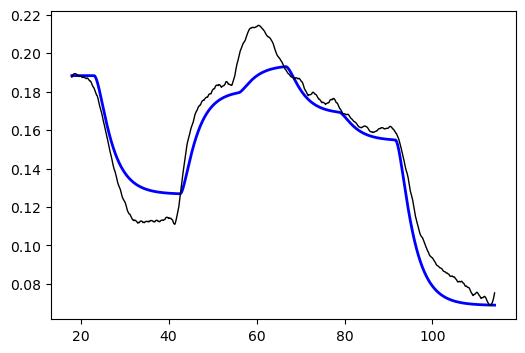

In [91]:
s = df_br1_trunc["Phase"]
# time_array_fit = [df_br1_trunc["BatchTime"].iloc[0]]
time_array_fit = []
time_array_fit = np.append(time_array_fit, df_br1_trunc["BatchTime"][s[s.diff() != 0].index.tolist()])
time_array_fit[1:] += 3
time_array_fit = np.append(time_array_fit, df_br1_trunc["BatchTime"].iloc[-1])

# pulse_array_fit = [df_br1_trunc["Phase"].iloc[0]]
pulse_array_fit = []
pulse_array_fit = np.append(pulse_array_fit, df_br1_trunc["Phase"][s[s.diff() != 0].index.tolist()])
# pulse_array_fit = np.append(pulse_array_fit, df_br1_trunc["Phase"].iloc[-1])

from tqdm import tqdm

time_array_pred = []
mu_array_pred = []

x0 = np.array(mu_steady([pulse_array_fit[0]], *parameters)).flatten()[-4:-1]

kdeg_R = 1e3
kdeg_Amp = 1e0
kdeg_E = 3e-1

pvar = [kdeg_R, kdeg_Amp, kdeg_E]

for i in range(len(time_array_fit)-1):
    pulse = pulse_array_fit[i]

    tspan = [time_array_fit[i], time_array_fit[i+1]]
    t_eval = np.linspace(tspan[0], tspan[1], 1000)
    pfixed = parameters
    
    sol = solve_ivp(myODEs, tspan, x0, method="BDF", t_eval=t_eval, args=(pfixed, pvar, pulse), rtol=1e-6, atol=1e-8)
    x0 = sol.y[:,-1]

    time_array_pred = np.append(time_array_pred, sol.t)
    mu_array_pred = np.append(mu_array_pred, sol.y[-1,:])

time_array_pred = np.array(time_array_pred)
mu_array_pred = np.array(mu_array_pred)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(time_array_pred, mu_array_pred, '-', linewidth=2, color="blue", label="Bioreactor 1")
ax.plot(df_br1_trunc["BatchTime"], df_br1_trunc["GrowthRateSmooth"], linewidth=1, color="black", label="Bioreactor 1")

In [95]:
from scipy.interpolate import interp1d


def generate_predictions_multisetpoint(pvar, time_delay = 3):

    s = df_br1_trunc["Phase"]
    # time_array_fit = [df_br1_trunc["BatchTime"].iloc[0]]
    time_array_fit = []
    time_array_fit = np.append(time_array_fit, df_br1_trunc["BatchTime"][s[s.diff() != 0].index.tolist()])
    time_array_fit = np.append(time_array_fit, df_br1_trunc["BatchTime"].iloc[-1])
    time_array_fit[1:] += time_delay

    # pulse_array_fit = [df_br1_trunc["Phase"].iloc[0]]
    pulse_array_fit = []
    pulse_array_fit = np.append(pulse_array_fit, df_br1_trunc["Phase"][s[s.diff() != 0].index.tolist()])
    # pulse_array_fit = np.append(pulse_array_fit, df_br1_trunc["Phase"].iloc[-1])

    time_array_pred = []
    mu_array_pred = []

    x0 = np.array(mu_steady([pulse_array_fit[0]], *parameters)).flatten()[-4:-1]

    for i in range(len(time_array_fit)-1):
        pulse = pulse_array_fit[i]

        # print(pulse)
        # print(pulse_old)
        # print(R_ss)
        # print('====================')

        tspan = [time_array_fit[i], time_array_fit[i+1]]
        t_eval = np.linspace(tspan[0], tspan[1], 1000)
        pfixed = parameters
        
        sol = solve_ivp(myODEs, tspan, x0, method="BDF", t_eval=t_eval, args=(pfixed, pvar, pulse), rtol=1e-3, atol=1e-6)
        x0 = sol.y[:,-1]

        time_array_pred = np.append(time_array_pred, sol.t)
        mu_array_pred = np.append(mu_array_pred, sol.y[-1,:])

    time_array_pred = np.array(time_array_pred)
    mu_array_pred = np.array(mu_array_pred)

    return time_array_pred, mu_array_pred

def generate_predictions_actdeact(pvar, time_delay = 3):
    phase_df = df_br1_trunc_actdeact["Phase"].str.extract('_(.+)%_')[0].astype(float)/100
    s = phase_df
    # time_array_fit = [df_br1_trunc["BatchTime"].iloc[0]]
    time_array_fit_actdeact = []
    time_array_fit_actdeact = np.append(time_array_fit_actdeact, df_br1_trunc_actdeact["BatchTime"][s[s.diff() != 0].index.tolist()])
    time_array_fit_actdeact[1:] += time_delay
    time_array_fit_actdeact = np.append(time_array_fit_actdeact, df_br1_trunc_actdeact["BatchTime"].iloc[-1])

    # pulse_array_fit = [df_br1_trunc["Phase"].iloc[0]]
    pulse_array_fit_actdeact = []
    pulse_array_fit_actdeact = np.append(pulse_array_fit_actdeact, phase_df[s[s.diff() != 0].index.tolist()])

    x0 = np.array(mu_steady([pulse_array_fit_actdeact[0]], *parameters)).flatten()[-4:-1]

    time_array_pred = []
    mu_array_pred = []

    for i in range(len(time_array_fit)-1):
        pulse = pulse_array_fit[i]


        tspan = [time_array_fit[i], time_array_fit[i+1]]
        t_eval = np.linspace(tspan[0], tspan[1], 1000)
        pfixed = parameters
        
        sol = solve_ivp(myODEs, tspan, x0, method="BDF", t_eval=t_eval, args=(pfixed, pvar, pulse), rtol=1e-3, atol=1e-6)
        x0 = sol.y[:,-1]

        time_array_pred = np.append(time_array_pred, sol.t)
        mu_array_pred = np.append(mu_array_pred, sol.y[-1,:])

    time_array_pred = np.array(time_array_pred)
    mu_array_pred = np.array(mu_array_pred)

    return time_array_pred, mu_array_pred

def calculate_error(p, info):
    time_delay = p[0]
    pvar = p[1:]

    error = 0

    time_array_pred, mu_array_pred = generate_predictions_multisetpoint(pvar, time_delay)

    # interpolate to match time points
    mu_array_pred_interp = np.interp(df_br1_trunc["BatchTime"], time_array_pred, mu_array_pred)
    error += np.mean((df_br1_trunc["GrowthRateSmooth"].to_numpy() - mu_array_pred_interp)**2)

    time_array_pred_actdeact, mu_array_pred_actdeact = generate_predictions_actdeact(pvar, time_delay)

    # interpolate to match time points
    mu_array_pred_interp_actdeact = np.interp(df_br1_trunc_actdeact["BatchTime"], time_array_pred_actdeact, mu_array_pred_actdeact)
    error += np.mean((df_br1_trunc_actdeact["GrowthRateSmooth"].to_numpy() - mu_array_pred_interp_actdeact)**2)

    if error < info['error_best']:
        info['error_best'] = error
        info['pars_best'] = p

    if info['Nfeval']%10 == 0:
        print('Nfeval: ', info['Nfeval'], 'error_best: ', info['error_best'], 'pars_best: ', info['pars_best'], 'error: ', error, 'pars: ', p)
    info['Nfeval'] += 1

    return error


In [96]:
time_delay = 3

kdeg_R = 1e3
kdeg_Amp = 1e0
kdeg_E = 2e-1

p = [time_delay, kdeg_R, kdeg_Amp, kdeg_E]
bounds = [(0, 10), (1e-3, 1e4), (1e-3, 1e4), (1e-3, 1e4)]

info = {'Nfeval':0, 'error_best': 1e10, 'pars_best': np.nan}

res = basinhopping(calculate_error, p, niter=1000, T=1, minimizer_kwargs={"method":"L-BFGS-B", "bounds":bounds, "args":(info,)})

Nfeval:  0 error_best:  0.005296775645402446 pars_best:  [3.e+00 1.e+03 1.e+00 2.e-01] error:  0.005296775645402446 pars:  [3.e+00 1.e+03 1.e+00 2.e-01]


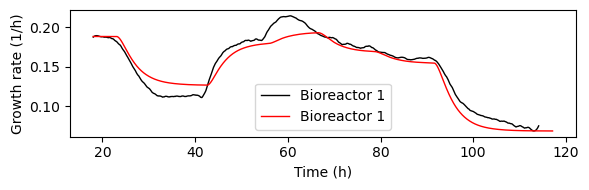

In [ ]:
kdeg_R = 1e3
kdeg_Amp = 1e0
kdeg_E = 2e-1

pvar = [kdeg_R, kdeg_Amp, kdeg_E]
# pvar = res.x

time_array_pred, mu_array_pred = generate_predictions_multisetpoint(pvar)

fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)
ax.plot(df_br1_trunc["BatchTime"].to_numpy(), df_br1_trunc["GrowthRateSmooth"], linewidth=1, color="black", label="Bioreactor 1")
ax.plot(time_array_pred, mu_array_pred, linewidth=1, color="red", label="Bioreactor 1")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth rate (1/h)")
ax.legend()
plt.tight_layout()

# time_array_pred, mu_array_pred = generate_predictions_actdeact(pvar)

# fig = plt.figure(figsize=(6, 2))
# ax = fig.add_subplot(111)
# ax.plot(df_br1_trunc_actdeact["BatchTime"].to_numpy(), df_br1_trunc_actdeact["GrowthRateSmooth"], linewidth=1, color="black", label="Bioreactor 1")
# ax.plot(df_br1_trunc_actdeact["BatchTime"].to_numpy(), mu_array_pred, linewidth=1, color="red", label="Bioreactor 1")
# ax.set_xlabel("Time (h)")
# ax.set_ylabel("Growth rate (1/h)")
# ax.legend()
# plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(I_arr, mu_arr, '-', linewidth=2, color="blue", label="Bioreactor 1")
ax.plot(keys_unique, mu_unique, 'o', linewidth=2, color="blue", label="Bioreactor 1")
ax.set_xscale('symlog', linthresh=0.01)

In [ ]:
mu_array_pred[-1]